# Doctor Consulting Fee

## DATA COLLECTION

In [ ]:
#importing the basic library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the test and train dataset
df=pd.read_csv('data11.csv',encoding='latin1')
dftest=pd.read_csv('datatest.csv',encoding='latin1')
#printing the records of train data
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [ ]:
#printing the records of test data
dftest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [ ]:
#displaying the bottom 5 rows of train dataset
df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [ ]:
#displaying the bottom 5 rows of test dataset
dftest.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ?500"


From above we can see that the Depandant variable is Continious type,



> So we can say that its a Linear regression problem



# Exploratory data analysis on yest data

In [ ]:
#displayinf the column name 
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In this problem we have **Fees** as Dependent variable and all other 6 columns 'Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info' as Independent varialbe 

In [ ]:
#displaying the number of columns and number of rows in our data set 
df.shape

(5961, 7)

We can see that we have 5961 rows (records) with 7 columns (variables)

In [ ]:
#seeing the data type of all the variable
data_types=df.dtypes
data_types

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

All Independent variable are categoriocal type. So it has to be converted into numerical type before model building  

In [ ]:
#count the frequency of each data type
data_types.value_counts()

object    6
int64     1
dtype: int64

we have 6 object type variable and i integer type variable 

In [ ]:
#displaying the information of all the variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [ ]:
#checking for null value
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

we can see that the column 'Rating' has 3302 missing value and 'Miscellaneous_Info' has 2620 missing value

In [ ]:
#seeing the number of unique element and there count in catagorical column
for i in df.columns:
  print(f'===== column: {i} =====')
  print("Number of unique value: ",df[i].nunique())
  print('Unique value and their Frequency are as follows:\n',df[i].value_counts())
  print('\n\n\n')

===== column: Qualification =====
Number of unique value:  1420
Unique value and their Frequency are as follows:
 BDS                                                                                                            488
BHMS                                                                                                           477
BAMS                                                                                                           471
MBBS                                                                                                           334
MBBS, MS - ENT                                                                                                 220
                                                                                                              ... 
Post Graduate Diploma in Healthcare Management(PGDHM), MBBS, MD - Internal Medicine                              1
BDS, MDS - Conservative Dentistry & Endodontics, Certificate in Dental Implants, 

We can see that data has to be treated correctly or else we wont be able to get the best fit model


1.   'Qualification' has 1420 unique value which is unlikely  
2.   'Miscellaneous_Info' has 2998 unique value and 2620 missing value so its better to **drop** this column and more over its has got mixed type of data.



In [ ]:
#looking at the statistical data 
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


I will do data cleaning before visualization as I fell that data has to be arranged correctly as our data set has got lot of overlaping and not indesired maner

# Data Cleaning On Both Test and Train Data Set

In [ ]:
#Droping the column 
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)
dftest.drop(['Miscellaneous_Info'],axis=1,inplace=True)

I tried building model with 'Qualification' column but acccuracy was low so I will drop 'Qualification' as we have 'Profile' column from which we would get simillar data

In [ ]:
#droping the qualification column
df.drop(['Qualification'],axis=1,inplace=True)
dftest.drop(['Qualification'],axis=1,inplace=True)

In [ ]:
#converting Experience column into integer type
df['Experience']=df['Experience'].str.split(' ').str[0]
dftest['Experience']=df['Experience'].str.split(' ').str[0]

In [ ]:
df['Experience']=df['Experience'].astype(int)
dftest['Experience']=df['Experience'].astype(int)

I have converted my Experience data into integer type by extractin only the number of years in the column

In [ ]:
#Fill the missing value in ratings
df['Rating'].fillna('50%',inplace=True)
dftest['Rating'].fillna('50%',inplace=True)

I have replaced the Rating column by the mediam if the range of the rating variable  

In [ ]:
#scaling doen the rating column
df['Rating']=df['Rating'].str[:-1]
dftest['Rating']=df['Rating'].str[:-1]

In [ ]:
df['Rating']=df['Rating'].astype(int)
dftest['Rating']=df['Rating'].astype(int)

In [ ]:
df['Rating']=df['Rating']/10
dftest['Rating']=df['Rating']/10

I have converted my ratings columns to 10 scale from 100 scale

In [ ]:
#filling the missing vlue in Place column by mode 
df['Place'].fillna(value=df['Place'].mode()[0],inplace=True)
dftest['Place'].fillna(value=df['Place'].mode()[0],inplace=True)

In [ ]:
#splitting the place column into area and city
df['Area']=df['Place'].str.split(',').str[0]
dftest['Area']=df['Place'].str.split(',').str[0]
df['City']=df['Place'].str.split(',').str[-1] 
dftest['City']=df['Place'].str.split(',').str[-1] 

I have converted the place column into city and area and now I am droping the place column as i have extracted the data from that column

In [ ]:
#droping the place column
df.drop(['Place'],axis=1,inplace=True)
dftest.drop(['Place'],axis=1,inplace=True)

In [ ]:
#see the value count of the city
df['City'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: City, dtype: int64

We can see that there is some unwanted data 'e' and I am replacing it by Ernakulam as it is the only city starting with e  

In [ ]:
#replacing the class 'e' with 'Ernakulam'
df['City']=df['City'].replace('e',' Ernakulam')
dftest['City']=df['City'].replace('e',' Ernakulam')

# EDA on train data 

In [ ]:
df.dtypes

Experience      int64
Rating        float64
Profile        object
Fees            int64
Area           object
City           object
dtype: object

In [ ]:
#storing the numerical and categorical column separately
num_col=['Experience','Rating','Fees']
cat_col=['Profile','Area','City']

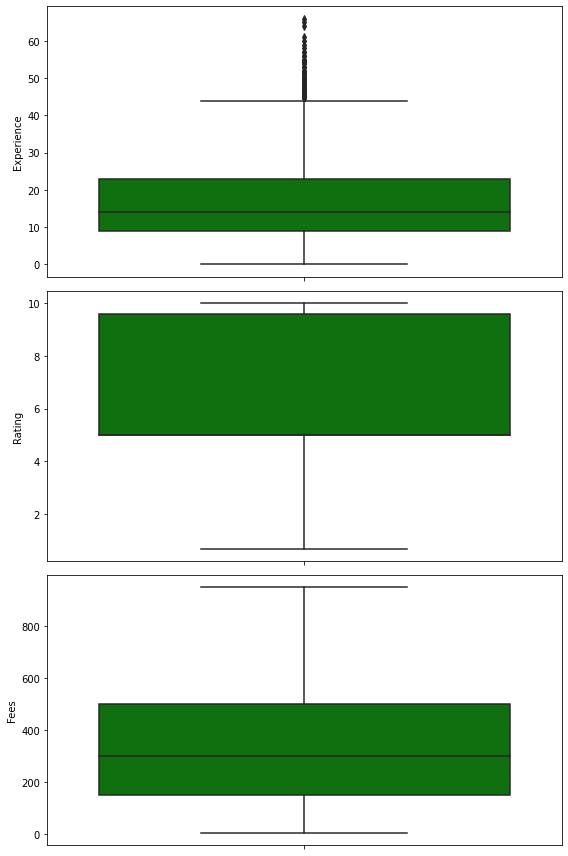

In [ ]:
#ploting the box plot for the numerical column
plt.figure(figsize=(8,12))
for n,col in enumerate(num_col):
  plt.subplot(3,1,n+1)
  sn.boxplot(y=col,color='g',data=df)
  plt.tight_layout()

We can see that the experience column has the outlier 

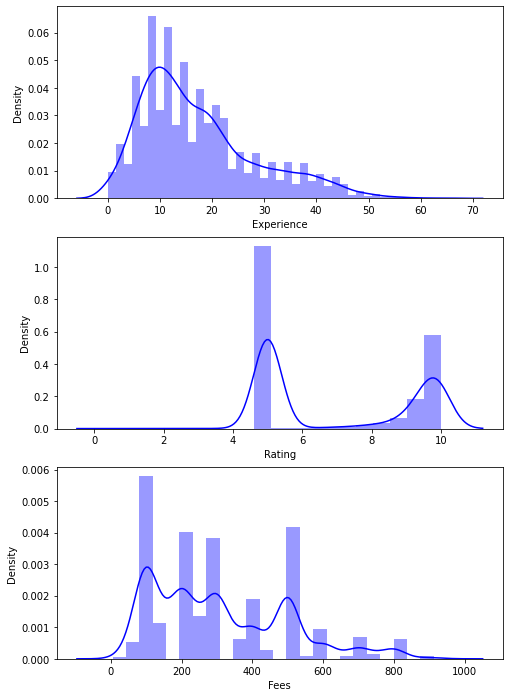

In [ ]:
#ploting the dist plot for the numerical column 
plt.figure(figsize=(8,12))
for n,col in enumerate(num_col):
  plt.subplot(3,1,n+1)
  sn.distplot(df[col],color='b')

We can see that the skewness is present in all the column

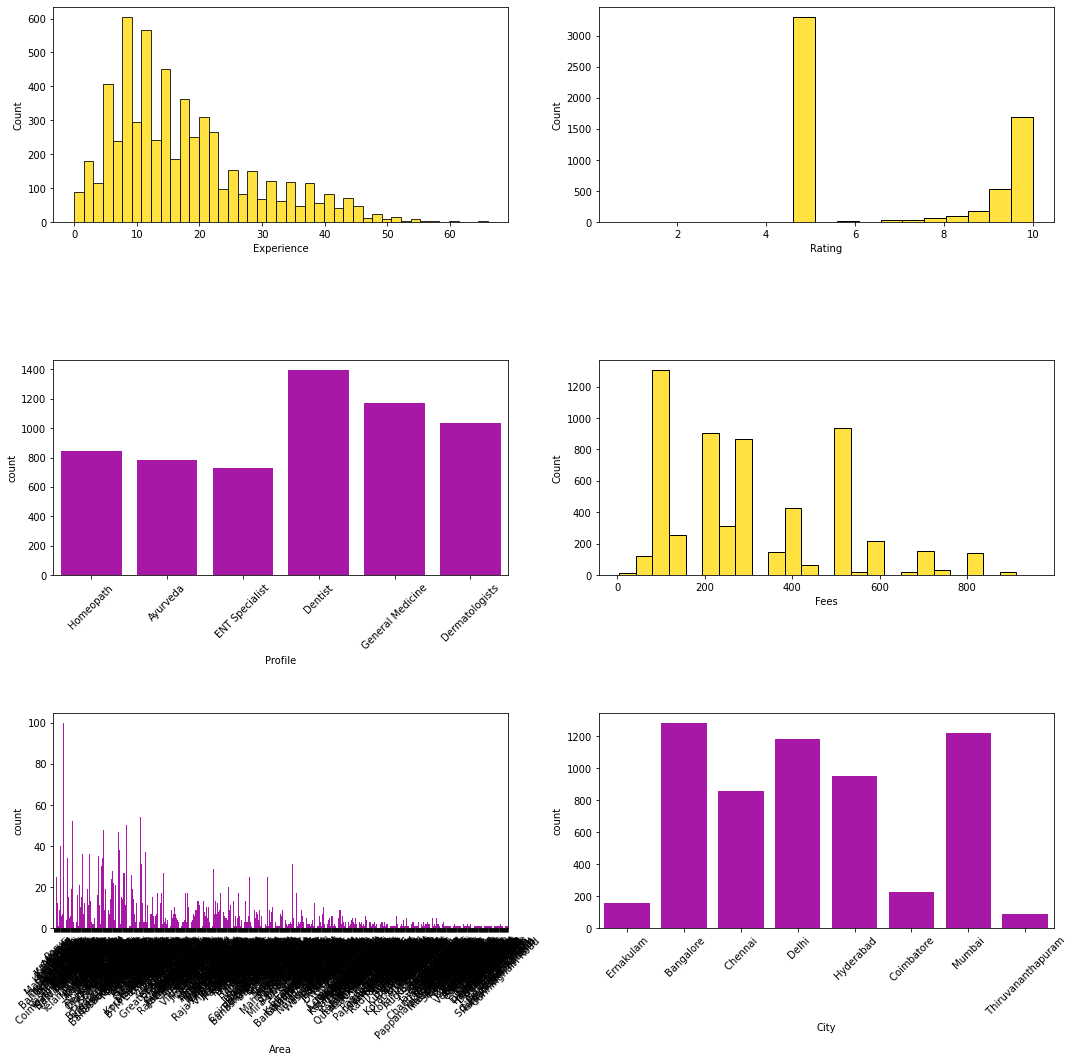

In [ ]:
# the count and hist plot 
plt.figure(figsize=(15,18))
for n,col in enumerate(df.columns):
  plt.subplot(4,2,n+1)
  if df[col].dtype == 'object':
    sn.countplot(x=col,color='m',data=df)
    plt.xticks(rotation=45)
    plt.tight_layout()
  else:
    sn.histplot(x=col,color='gold',data=df)
    plt.tight_layout()

We have 866 entries in the area column so we can cannot the xtick correctly apart from that

> Metro city has high records

> Dentist has high demand

> Most of the doctor charging between 100 to 300







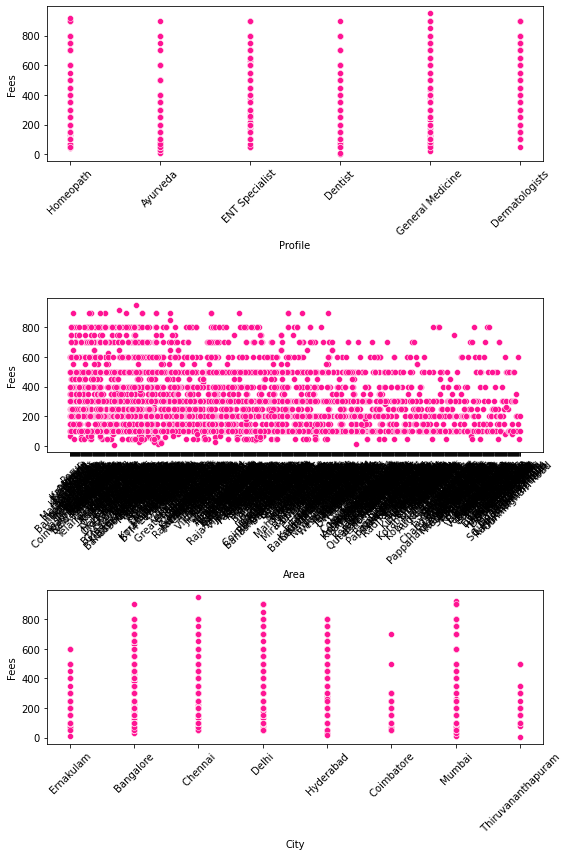

In [ ]:
#ploting the scatter plot for the numerical column 
plt.figure(figsize=(8,12))
for n,col in enumerate(cat_col):
  plt.subplot(3,1,n+1)
  sn.scatterplot(x=col,y='Fees',color='deeppink',data=df)
  plt.xticks(rotation=45)
  plt.tight_layout()

We can see that we are not able to plot the best fit line with our depemdent varialbe

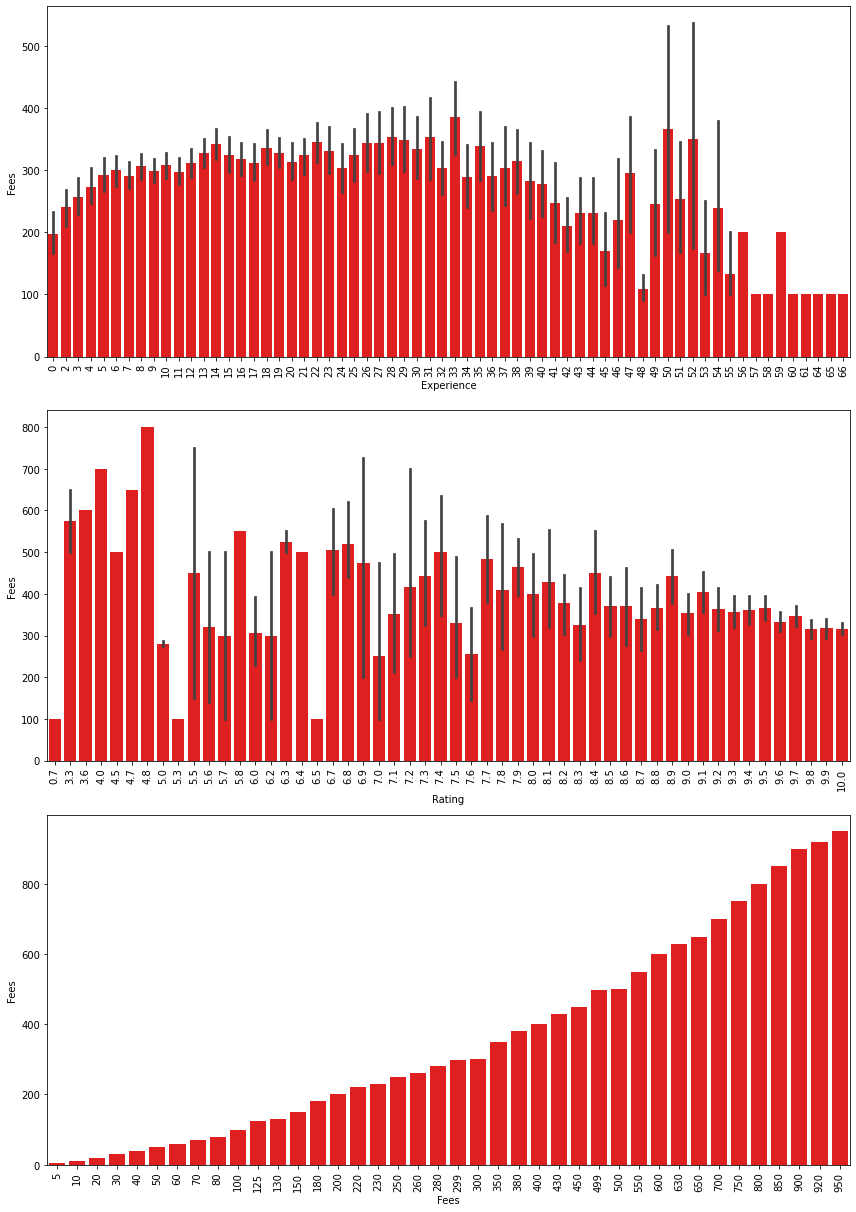

In [ ]:
# plotting the barplot
plt.figure(figsize=(12,22))
for n,col in enumerate(num_col):
  plt.subplot(4,1,n+1)
  sn.barplot(x=col,y='Fees',color='r',data=df)
  plt.xticks(rotation=90)
  plt.tight_layout()

For mid range experienced doctor the fees is more than that of the very experienced doctor

> And we can see that the low rating doctors also charging high 



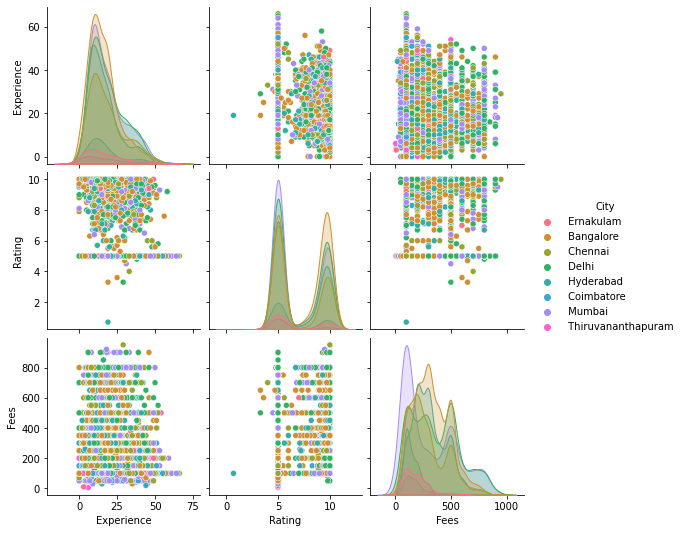

In [ ]:
#plotting the pair plot 
sn.set_palette('Accent_r')
sn.pairplot(df,hue='City')
plt.show()

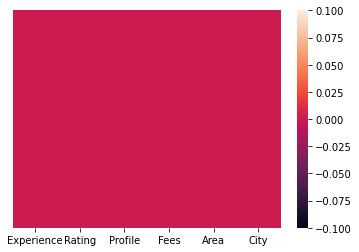

In [ ]:
#plotting the heat map to see wheather the null value is present or not
sn.heatmap(df.isnull(),yticklabels=False);

We can see that there are not null value in the train data set 

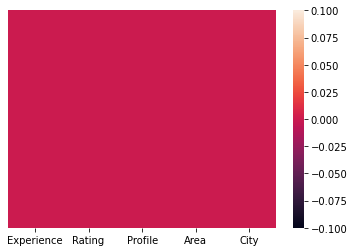

In [ ]:
#plotting the heat map to see wheather the null value is present or not
sn.heatmap(dftest.isnull(),yticklabels=False);

We cam see that there are no null value in our test data set also

In [ ]:
#lets see the corelation between the each variable
dfcor=df.corr()
dfcor

,Experience,Rating,Fees
Experience,1.000000,-0.059324,0.002117
Rating,-0.059324,1.000000,0.139142
Fees,0.002117,0.139142,1.000000


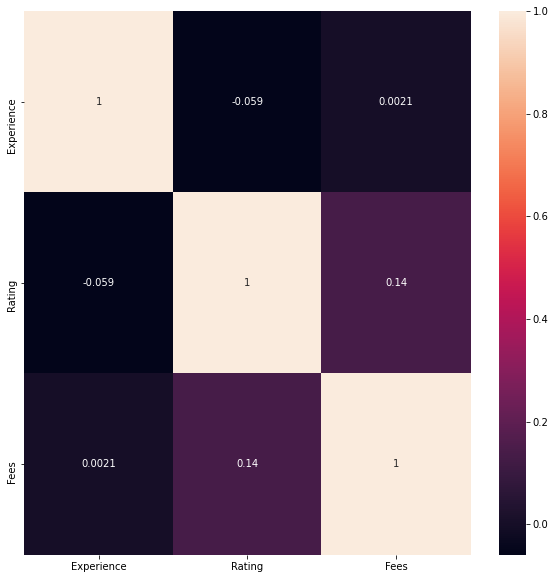

In [ ]:
#lets plot the heat map
plt.figure(figsize=(10,10))
sn.heatmap(dfcor,annot=True)

We can see that the corelation is with fees is less than 2 with all the variable 

In [ ]:
#spliting the data into x and y
x = df.drop("Fees",axis=1)
y = df['Fees']

X contains all the independent variable and Y contains the dependent variable  

In [ ]:
#Encoding our data
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
enc = OrdinalEncoder()
x = pd.DataFrame(enc.fit_transform(x),columns=x.columns)
dftest= enc.fit_transform(dftest)

In [ ]:
#applying standard scaling method on X variable 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
dftest= ss.fit_transform(dftest)

# Model Building

In [ ]:
#importing the library for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

In [ ]:
#selecting the best random state
from sklearn.ensemble import RandomForestRegressor

mA=0
mRS=0
for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
  mod=RandomForestRegressor()
  mod.fit(x_train,y_train)
  pred=mod.predict(x_test)
  r2=mod.score(x_train,y_train)
  if r2>mA:
    mA=r2
    mRS=i
print('Best accuracy is ',mA,' on random state ',mRS)

Best accuracy is  0.8792925285924585  on random state  2


In [ ]:
#building the model using LinearRegression, RandomForestRegressor, DecissionTreeRegressor, svrkernal, Lasso
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
#spliting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [ ]:
#building model 
model={LinearRegression():"LinearRegression", DecisionTreeRegressor():'DecisionTreeRegressor', RandomForestRegressor():'RandomForestRegressor', Lasso():'Lasso', 
  SVR():'SVR'}
r2score=[]
crossvalidation=[]
for key in model:
  print("===== ",model.get(key),' model ===== ')
  key.fit(x_train,y_train)
  pred=key.predict(x_test)
  sco=key.score(x_train,y_train)
  print("Fit of the model with train data ",sco)
  r2=abs(r2_score(y_test,pred))
  print("R2 Score / Accuracy Score is ",r2)
  r2score.append(r2)
  cvv = KFold(n_splits=10, shuffle=True)
  c=cross_val_score(key,x,y,cv=cvv,scoring='r2')
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  mse=mean_squared_error(y_test,pred)
  print('Mean Squared Error',mse)
  mae=mean_absolute_error(y_test,pred)
  print('Mean Absolute Error',mae)
  print('\n\n\n')

=====  LinearRegression  model ===== 
Fit of the model with train data  0.048619765260937475
R2 Score / Accuracy Score is  0.04948368154452032
Cross validation score is 0.04596425544104147 

Mean Squared Error 33280.351658980566
Mean Absolute Error 151.1776398703274




=====  DecisionTreeRegressor  model ===== 
Fit of the model with train data  0.9945054698041984
R2 Score / Accuracy Score is  0.692113969229649
Cross validation score is 0.5314679199277551 

Mean Squared Error 59245.850754611514
Mean Absolute Error 174.74846282839576




=====  RandomForestRegressor  model ===== 
Fit of the model with train data  0.881398244193679
R2 Score / Accuracy Score is  0.1233539733769844
Cross validation score is 0.14294096473412238 

Mean Squared Error 30693.937052937094
Mean Absolute Error 134.55693013743598




=====  Lasso  model ===== 
Fit of the model with train data  0.04846928630035363
R2 Score / Accuracy Score is  0.04939758737579336
Cross validation score is 0.04618947054154404 

Mean 

In [90]:
#selecting the best model from the above model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor', 'Lasso','SVR']
Modelselection['R2 Score']=r2score
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of Acc_Score and Cross_Val']=abs(Modelselection['R2 Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,R2 Score,Cross Validation,Diff of Acc_Score and Cross_Val
0,LinearRegression,0.049484,0.045964,0.003519
1,DecisionTreeRegressor,0.692114,0.531468,0.160646
2,RandomForestRegressor,0.123354,0.142941,0.019587
3,Lasso,0.049398,0.046189,0.003208
4,SVR,0.044288,0.040239,0.004049


I am selecting  the Decision treee as my best model as it has got high accuracy of 69% with 16% deviation and lets do hyper parameter tuning 

In [ ]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

p1={'criterion':['mse','poisson'], 'max_depth':[2,4,6], 'max_features':['auto','sqrt']}
p2={'splitter':['random'], 'max_leaf_nodes':np.arange(2,10,2), 'min_samples_split':[6,4,2] }
p=[p1,p2]

for i in p:
  dtr=DecisionTreeRegressor()
  gsc=GridSearchCV(dtr,i)
  gsc.fit(x_train,y_train)
  print(gsc.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto'}
{'max_leaf_nodes': 8, 'min_samples_split': 2, 'splitter': 'random'}


In [94]:
#modle1
mod1=DecisionTreeRegressor(criterion='mse',max_depth=4,max_features='auto')
mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
r2=abs(r2_score(y_test,pred))
print("R2 Score / Accuracy Score is ",r2)

cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(mod1,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')

R2 Score / Accuracy Score is  0.1447384219076524
Cross validation score is 0.1337992206325959 



In [95]:
#model2
mod1=DecisionTreeRegressor(max_leaf_nodes=8,min_samples_split=2,splitter='random')
mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
r2=abs(r2_score(y_test,pred))
print("R2 Score / Accuracy Score is ",r2)

cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(mod1,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')

R2 Score / Accuracy Score is  0.08601422158238226
Cross validation score is 0.1096640800642219 



In [92]:
#finm
finm=DecisionTreeRegressor()
finm.fit(x_train,y_train)
pred=finm.predict(x_test)
r2=abs(r2_score(y_test,pred))
print("R2 Score / Accuracy Score is ",r2)

cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(finm,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')

R2 Score / Accuracy Score is  0.6828344752163158
Cross validation score is 0.5165345971484485 



We have got the model **finm** with **68%** and with variance of 14%. So I am saving this model

# Saving the model

In [96]:
#MODEL SAVING
import joblib
joblib.dump(finm,'FinalModel.pk1')

['FinalModel.pk1']

# Now Predicting our test data

In [97]:
#predicting the value 
x_test=dftest
y_pred=finm.predict(x_test)
y_pred

array([250., 600., 600., ..., 100., 100., 500.])

In [98]:
#Storing the predicted values in dataframe
predicted_data=pd.DataFrame({'Prde_Fees':y_pred})
predicted_data

,Prde_Fees
0,250.0
1,600.0
2,600.0
3,200.0
4,100.0
...,...
1982,300.0
1983,100.0
1984,100.0
1985,100.0


In [104]:
#saving the predicted data frame
predicted_data.to_html('fee_predicted.html',index=False)